In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
dt = pd.read_csv("F:/Kaggle/E-Commerce-Analysis/Pakistan Largest Ecommerce Dataset.csv")
# print the columns of all dataframes
df.info()
#dt.columns

c:\Users\LiangYu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  float64
 1   status           584509 non-null  object 
 2   created_at       584524 non-null  object 
 3   sku              584504 non-null  object 
 4   price            584524 non-null  float64
 5   qty_ordered      584524 non-null  float64
 6   grand_total      584524 non-null  float64
 7   category_name_1  584360 non-null  object 
 8   discount_amount  584524 non-null  float64
 9   payment_method   584524 non-null  object 
 10  Working Date     584524 non-null  object 
 11  Year             584524 non-null  float64
 12  Month            584524 non-null  float64
 13  Customer ID      584513 non-null  float64
dtypes: float64(8), object(6)
memory usage: 112.0+ MB


In [223]:
#保留需要的columns，並且刪除整行是空值的欄位
dt = dt.loc[:,["item_id", "status", "created_at", "sku", "price", "qty_ordered", "grand_total", "category_name_1","discount_amount", \
    "payment_method", "Year", "Month", "Customer ID"]]
dt = dt.dropna(how = 'all')

In [224]:
#將部分columns轉換成正確的資料類型
dt['Customer ID'] = dt['Customer ID'].astype(str)
dt['item_id'] = dt['item_id'].astype(str)
dt['qty_ordered'] = dt['qty_ordered'].astype(int)  
dt['Year'] = dt['Year'].astype(int)  
dt['Month'] = dt['Month'].astype(int)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  object 
 1   status           584509 non-null  object 
 2   created_at       584524 non-null  object 
 3   sku              584504 non-null  object 
 4   price            584524 non-null  float64
 5   qty_ordered      584524 non-null  int32  
 6   grand_total      584524 non-null  float64
 7   category_name_1  584360 non-null  object 
 8   discount_amount  584524 non-null  float64
 9   payment_method   584524 non-null  object 
 10  Year             584524 non-null  int32  
 11  Month            584524 non-null  int32  
 12  Customer ID      584524 non-null  object 
dtypes: float64(3), int32(3), object(7)
memory usage: 55.7+ MB


In [225]:
#將消費日期轉為正確格式%Y/%m/%m
dt["Day"] = dt["created_at"].str.split('/', expand=True)[1].apply(lambda x: x if len(x)>1 else "0"+x)
dt["Month"] = dt["Month"].astype(str).apply(lambda x: x if len(x)>1 else "0"+x)
dt["created_at"] = dt["Year"].astype(str) + "-" + dt["Month"] + "-" + dt["Day"].astype(str)
dt["created_at_date"] = pd.to_datetime(dt["created_at"])
print(dt["created_at_date"].min())
print(dt["created_at_date"].max())

2016-07-01 00:00:00
2018-08-28 00:00:00


2016/07/01
2018/08/28


In [158]:
df.describe(include=['object','bool']).T

,count,unique,top,freq
status,584509,16,complete,233685
created_at,584524,789,11/25/2016,15169
sku,584504,84889,MATSAM59DB75ADB2F80,3775
category_name_1,584360,16,Mobiles & Tablets,115710
payment_method,584524,18,cod,271960
Working Date,584524,789,11/25/2016,15169


In [102]:
#1: 計算2021/01/01 - 2023/03/08 月營收
revenue = df[["invoice_date_y", "invoice_date_m", "quantity", "price"]].groupby(["invoice_date_y","invoice_date_m"]).agg('sum').sort_values(by=["invoice_date_y","invoice_date_m"]).reset_index()
invoice_date_y_m = revenue["invoice_date_y"].astype(str) + "-" + revenue["invoice_date_m"].astype(str)
revenue.insert(0, "invoice_date_y_m", invoice_date_y_m)
revenue

,invoice_date_y_m,invoice_date_y,invoice_date_m,quantity,price
0,2021-01,2021,01,11483,2656422.78
1,2021-02,2021,02,10179,2358636.34
2,2021-03,2021,03,11383,2618434.14
3,2021-04,2021,04,11270,2558825.62
4,2021-05,2021,05,11620,2662369.93
5,2021-06,2021,06,11352,2547239.73
6,2021-07,2021,07,11986,2802468.58
7,2021-08,2021,08,11205,2632303.32
8,2021-09,2021,09,10901,2530305.88
9,2021-10,2021,10,11711,2782418.40


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

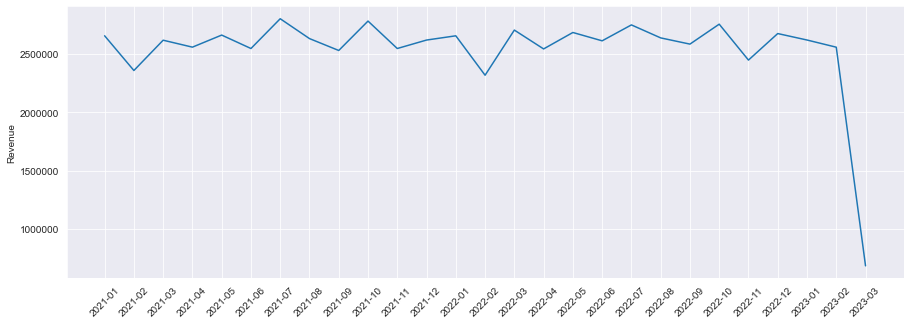

In [122]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("darkgrid")
sns.lineplot(data=revenue, x="invoice_date_y_m", y="price")
ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_xlabel('')
ax.set_ylabel('Revenue')
plt.xticks(rotation=45)

##改xy軸還有刻度

人均訂單數、客單價


In [143]:
dup_cus = df[df.duplicated(subset="customer_id", keep=False)]
dup_cus

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,invoice_date_d,invoice_date_m,invoice_date_y,invoice_date_n


In [142]:
shop_sum = revenue.groupby("invoice_date_y")["price"].agg("sum")
customer_id_count = df.groupby("invoice_date_y")["invoice_no","customer_id"].nunique()
customer_id_count
# shop_per_num =pd.concat([shop_sum,customer_id_count],axis=1)
# shop_per_num

<ipython-input-142-f3e69c96aca5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_id_count = df.groupby("invoice_date_y")["invoice_no","customer_id"].nunique()


,invoice_no,customer_id
invoice_date_y,,
2021,45382,45382
2022,45551,45551
2023,8524,8524


In [112]:
#order_data = pd.merge(df_orders, df_order_payments, on="order_id")
order_count = order_data[order_data["order_status"] != "canceled"].groupby("order_purchase_y").agg("count")
customer_id_count = order_data[order_data["order_status"] != "canceled"].groupby("order_purchase_y")["customer_id"].nunique()
order_count

使用 customer_unique_id 辨識消費者是否為新舊客。
消費人數(分新舊客)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100756 non-null  object        
 1   customer_id                    100756 non-null  object        
 2   order_status                   100756 non-null  object        
 3   order_purchase_timestamp       100756 non-null  datetime64[ns]
 4   order_approved_at              100742 non-null  object        
 5   order_delivered_carrier_date   100754 non-null  object        
 6   order_delivered_customer_date  100748 non-null  object        
 7   order_estimated_delivery_date  100756 non-null  object        
 8   payment_sequential             100756 non-null  int64         
 9   payment_type                   100756 non-null  object        
 10  payment_installments           100756 non-null  int64         
 11  

In [142]:
#2016 - 2018 人均訂單數
customer_id
order_count = order_data[order_data["order_status"] != "canceled"].groupby("order_purchase_y").agg("count")
customer_id_count = order_data[order_data["order_status"] != "canceled"].groupby("order_purchase_y")["customer_id"].nunique()
order_count


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_m,order_purchase_y_m,order_purchase_date
order_purchase_y,,,,,,,,,,,,,,,
2016,320,320,320,320,320,293,283,320,320,320,320,320,320,320,320
2017,47235,47235,47235,47235,47217,46296,45723,47235,47235,47235,47235,47235,47235,47235,47235
2018,55667,55667,55667,55667,55666,55331,54742,55667,55667,55667,55667,55667,55667,55667,55667


In [141]:
customer_id_count

order_purchase_y  customer_id                     
2016              16e14c1e6e050fe6730c961ff638ca23    7
                  02cb3a8ef6e13d37560379559e2f533d    3
                  1cbeb91a58bd89ee2df1bc32f3311209    3
                  031f08a1ebdcfb5e706831bf64de3860    2
                  3dc7eb6da6c008460353d9a171e8fe6d    2
                                                     ..
2018              fff93c1da78dafaaa304ff032abc6205    1
                  fffb97495f78be80e2759335275df2aa    1
                  fffcb937e9dd47a13f05ecb8290f4d3e    1
                  fffeda5b6d849fbd39689bb92087f431    1
                  ffff42319e9b2d713724ae527742af25    1
Name: customer_id, Length: 98815, dtype: int64